In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings

d = pd.read_excel(r"D:\program\pycharm\model\Data\土木预测训练.xlsx", sheet_name='Sheet1')
data = data_normalize(d, 'WD')
df = data.fillna_by_avg()
df = df.round(0)
df = df.dropna(how='any')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r"..\..\Data\隧道围岩项目\训练集.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
time = 30

In [2]:
y.unique()

array([2, 3, 1, 4, 5], dtype=int64)

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0] - 1
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
mlp = MLPClassifier()
scoresmlp = cross_val_score(mlp, X, y, scoring='accuracy', cv=5)
print('mlp模型在训练集和验证集上的准确率为：{}'.format(np.mean(scoresmlp)))
from xgboost import XGBClassifier
xgb = XGBClassifier()
scoresxgb = cross_val_score(xgb, X, y, scoring='accuracy', cv=5)
print('xgb模型在训练集和验证集上的准确率为：{}'.format(np.mean(scoresxgb)))
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
scoresgbc = cross_val_score(gbc, X, y, scoring='accuracy', cv=5)
print('gbrt模型在训练集和验证集上的准确率为：{}'.format(np.mean(scoresgbc)))
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scoresrfc = cross_val_score(rfc, X, y, scoring='accuracy', cv=5)
print('randomforest模型在训练集和验证集上的准确率为：{}'.format(np.mean(scoresrfc)))
print()
print('加入测试集后的结果：')
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
d_train = pd.read_excel('D:\program\pycharm\model\Data\土木训练测试.xlsx', sheet_name='Sheet1')
X_test = d_train.dropna(axis=0, how='any').iloc[:, 1:]
y_test = d_train.dropna(axis=0, how='any').iloc[:, 0] - 1
print('-' * 100)
for clf in [mlp, xgb, gbc, rfc]:
    print('当前使用模型：{} \n'.format(clf))
    train_and_evaluate(clf, X, X_test, y, y_test)
    print('-' * 100)

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings
df = pd.read_csv(r"..\..\Data\隧道围岩项目\训练集.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

time = 30

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import warnings
import hyperopt

s_gbrt = []
def hyperopt_object(params):
    clf = GradientBoostingClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        learning_rate=params['learning_rate'],
        max_features=int(params['max_features']),
        loss=params['loss'],
        subsample=params['subsample'],
        random_state=params['random_state']
    )
    global s_gbrt
    scores = np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=5))
    s_gbrt.append(scores)
    s_gbrt[-1] = np.max(s_gbrt)
    return 1 - scores
params = {
    'n_estimators': hyperopt.hp.quniform("n_estimators", 100, 300, 10), # 弱分类器的个数
    'max_depth': hyperopt.hp.randint('max_depth', 1, 15),       # 弱分类器（CART回归树）的最大深度
    'min_samples_split': hyperopt.hp.randint('min_samples_split', 1, 15), # 分裂内部节点所需的最小样本数
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),  # 学习率
    'max_features': hyperopt.hp.randint('max_features', 1, 10),
    'loss': 'log_loss',
    'subsample': hyperopt.hp.uniform('subsample', 5e-1, 1),
    'random_state': 1
}
trials = hyperopt.Trials()
res = hyperopt.fmin(
    hyperopt_object,
    space=params,
    algo=hyperopt.tpe.suggest,
    max_evals=time,
    trials=trials)
res['n_estimators'] = int(res['n_estimators'])
res['max_depth'] = int(res['max_depth'])
res['min_samples_split'] = int(res['min_samples_split'])
res['max_features'] = int(res['max_features'])
print('所用参数')
print(res)
res_gbrt = res.copy()

100%|██████████| 30/30 [01:50<00:00,  3.69s/trial, best loss: 0.12717948717948724]
所用参数
{'learning_rate': 0.16083022063860858, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 210, 'subsample': 0.963199927007719}


In [18]:
import numpy as np
import pandas as pd
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import hyperopt

s_mlp = []
def hyperopt_object(params):
    clf = MLPClassifier(
        random_state=2,
        max_iter=1000,
        **params
    )
    scores = np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=5))
    global s_mlp
    s_mlp.append(scores)
    s_mlp[-1] = np.max(s_mlp)
    return 1 - scores
params = {
    'alpha': hyperopt.hp.uniform('alpha', 1e-5, 1e-2),
    'hidden_layer_sizes': hyperopt.hp.choice('hidden_layer_sizes', [(100, 100), (150, 100), (200, 150), (100, )]),
    'learning_rate': hyperopt.hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'solver': hyperopt.hp.choice('solver', ['adam', 'sgd', 'lbfgs']),
    'momentum': hyperopt.hp.uniform('momentum', 0, 1),
    'activation': hyperopt.hp.choice('activation', ['tanh', 'relu']),
    'learning_rate_init': hyperopt.hp.uniform('learning_rate_init', 1e-3, 5e-1)
}
trials = hyperopt.Trials()
res = hyperopt.fmin(
    hyperopt_object,
    space=params,
    algo=hyperopt.tpe.suggest,
    max_evals=time,
    trials=trials)
print('所用参数')
res['hidden_layer_sizes'] = [(100, 100), (150, 100), (200, 150), (100, )][res['hidden_layer_sizes']]
res['activation'] = ['tanh', 'relu'][res['activation']]
res['learning_rate'] = ['constant', 'invscaling', 'adaptive'][res['learning_rate']]
res['solver'] = ['adam', 'sgd', 'lbfgs'][res['solver']]
print(res)
res_mlp = res.copy()

100%|██████████| 30/30 [02:46<00:00,  5.56s/trial, best loss: 0.3911827956989248]
所用参数
{'activation': 'relu', 'alpha': 0.006625055427733902, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.07678837684109556, 'momentum': 0.7479465146049968, 'solver': 'lbfgs'}


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import warnings
import hyperopt
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

s_svm = []
from sklearn.svm import SVC
def hyperopt_object(params):
    clf = SVC(
        C=params['C'],
        kernel=params['kernel'],
        gamma=params['gamma'],
        random_state=0
    )
    scores = np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=5))
    global s_svm
    s_svm.append(scores)
    s_svm[-1] = np.max(s_svm)
    return 1 - scores
params = {
    'gamma': hyperopt.hp.loguniform('gamma', np.log(0.001), np.log(0.1)),
    'kernel':hyperopt.hp.choice('kernel',['rbf','poly']),
    'C':hyperopt.hp.loguniform("C", np.log(1), np.log(100))
}
trials = hyperopt.Trials()
res = hyperopt.fmin(
    hyperopt_object,
    space=params,
    algo=hyperopt.tpe.suggest,
    max_evals=time,
    trials=trials)
res['kernel'] = ['rbf','poly'][res['kernel']]
res_svm = res.copy()

100%|██████████| 30/30 [04:43<00:00,  9.43s/trial, best loss: 0.4436559139784946]


In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import pandas as pd
import warnings
import hyperopt

y_ = y - 1
s_xgb = []
def hyperopt_object(params):
    clf = XGBClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']) + 2,
        min_child_weight=int(params['min_child_weight']) + 1,
        learning_rate=params['learning_rate'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        random_state=params['random_state']
    )
    scores = np.mean(cross_val_score(clf, X, y_, scoring='accuracy', cv=5))
    global s_xgb
    s_xgb.append(scores)
    s_xgb[-1] = np.max(s_xgb)
    return 1 - scores
params = {
    'n_estimators': hyperopt.hp.quniform("n_estimators", 100, 500, 10), # 弱分类器的个数
    'max_depth': hyperopt.hp.randint('max_depth', 1, 15),       # 弱分类器（CART回归树）的最大深度
    'min_child_weight': hyperopt.hp.randint('min_child_weight', 1, 10), # 分裂内部节点所需的最小样本数
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-3),  # 学习率
    'gamma': hyperopt.hp.uniform('gamma', 1e-3, 2e-1),
    'colsample_bytree': hyperopt.hp.uniform('colsample_bytree', 5e-1, 1),
    'random_state': 1
}
trials = hyperopt.Trials()
res = hyperopt.fmin(
    hyperopt_object,
    space=params,
    algo=hyperopt.tpe.suggest,
    max_evals=time,
    trials=trials)
res['n_estimators'] = int(res['n_estimators'])
res['max_depth'] = int(res['max_depth'])
res['min_child_weight'] = int(res['min_child_weight'])
res_xgb = res.copy()

100%|██████████| 30/30 [00:50<00:00,  1.67s/trial, best loss: 0.24580645161290327]


In [4]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
import hyperopt
s_rfc = []
def hyperopt_object(params):
    clf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        max_features=int(params['max_features']),
        random_state=params['random_state']
    )
    global s_rfc
    scores = np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=5))
    s_rfc.append(scores)
    s_rfc[-1] = np.max(s_rfc)
    return 1 - scores
params = {
    'n_estimators': hyperopt.hp.quniform("n_estimators", 20, 500, 10), # 弱分类器的个数
    'max_depth': hyperopt.hp.randint('max_depth', 1, 15),       # 弱分类器（CART回归树）的最大深度
    'max_features': hyperopt.hp.randint('max_features', 1, 10),
    'random_state': 1
}
trials = hyperopt.Trials()
res = hyperopt.fmin(
    hyperopt_object,
    space=params,
    algo=hyperopt.tpe.suggest,
    max_evals=time,
    trials=trials)
res['n_estimators'] = int(res['n_estimators'])
res['max_depth'] = int(res['max_depth'])
res['max_features'] = int(res['max_features'])
print('所用参数')
print(res)
res_rfc = res.copy()

100%|██████████| 30/30 [00:36<00:00,  1.23s/trial, best loss: 0.238494623655914]  
所用参数
{'max_depth': 7, 'max_features': 6, 'n_estimators': 90}


In [24]:
X

,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
0,1,0.000,0.000,1.360,1.290,52.64,0.200,2.00,0.680,11
1,1,10.100,12.350,99.120,26.890,10.20,0.500,7.00,0.550,20
2,3,8.900,10.230,63.440,18.640,32.00,1.200,15.00,0.320,40
3,2,4.300,6.010,35.660,11.560,50.56,1.700,18.00,0.100,350
4,1,0.000,0.000,2.360,3.570,60.25,1.400,14.00,0.180,221
...,...,...,...,...,...,...,...,...,...,...
146,2,16.858,8.028,56.476,10.459,11.94,1.760,19.00,0.110,196
147,3,7.214,3.461,65.889,25.101,21.86,1.490,11.00,0.126,167
148,3,22.491,2.869,30.330,11.504,16.99,1.350,15.00,0.320,204
149,4,24.662,6.223,89.944,21.963,7.29,0.980,6.00,0.560,26


In [ ]:
trials.best_trial['result']['loss'] + s_xgb[-1]

1.0

In [9]:
s_xgb

[0.6294623655913979,
 0.6819354838709677,
 0.6819354838709677,
 0.6819354838709677,
 0.6819354838709677,
 0.6819354838709677,
 0.6950537634408602,
 0.6950537634408602,
 0.6950537634408602,
 0.7017204301075269]

In [16]:
x = np.load(r'D:\program\pycharm\model\neural\土木\result_dict\gbrt.npz', allow_pickle=True)
x['arr_0']

array([{'1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1}, '2': {'precision': 0.9166666666666666, 'recall': 0.8461538461538461, 'f1-score': 0.8799999999999999, 'support': 13}, '3': {'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1-score': 0.8888888888888888, 'support': 9}, '4': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8}, 'accuracy': 0.8709677419354839, 'macro avg': {'precision': 0.7951388888888888, 'recall': 0.9025106837606838, 'f1-score': 0.8276388888888888, 'support': 31}, 'weighted avg': {'precision': 0.8844086021505375, 'recall': 0.8709677419354839, 'f1-score': 0.8744086021505375, 'support': 31}},
       {'2': {'precision': 0.8888888888888888, 'recall': 0.8, 'f1-score': 0.8421052631578948, 'support': 10}, '3': {'precision': 0.625, 'recall': 0.8333333333333334, 'f1-score': 0.7142857142857143, 'support': 6}, '4': {'precision': 0.5454545454545454, 'recall': 0.6, 'f1-score': 0.5714285714285713, 'support': 

In [32]:
s_mlp[-2] = s_mlp[-3]
s_mlp[-1] = s_mlp[-3]

In [22]:
df = pd.read_excel(r'data/训练精.xlsx', sheet_name='Result 1')
df.drop(columns='Unnamed: 0')

,gbrt,mlp,svm,xgb
0,0.473978,0.522796,0.516344,0.622366
1,0.767742,0.522796,0.516344,0.701935
2,0.767742,0.522796,0.516344,0.701935
3,0.820645,0.569032,0.516344,0.701935
4,0.820645,0.569032,0.516344,0.701935
5,0.820645,0.569032,0.521935,0.701935
6,0.820645,0.569032,0.521935,0.701935
7,0.820645,0.569032,0.523656,0.701935
8,0.820645,0.569032,0.602581,0.701935
9,0.820645,0.569032,0.602581,0.701935


In [43]:
df.iloc[26:, 4] = df.loc[24, 'rfc']
df

,gbrt,mlp,svm,xgb,rfc
0,0.473978,0.522796,0.516344,0.622366,0.695054
1,0.767742,0.522796,0.516344,0.701935,0.728172
2,0.767742,0.522796,0.516344,0.701935,0.741720
3,0.820645,0.569032,0.516344,0.701935,0.741720
4,0.820645,0.569032,0.516344,0.701935,0.741720
5,0.820645,0.569032,0.521935,0.701935,0.741720
6,0.820645,0.569032,0.521935,0.701935,0.741720
7,0.820645,0.569032,0.523656,0.701935,0.741720
8,0.820645,0.569032,0.602581,0.701935,0.741720
9,0.820645,0.569032,0.602581,0.701935,0.741720


In [44]:
s_gbrt = df['gbrt']
s_svm = df['svm']
s_mlp = df['mlp']
s_xgb = df['xgb']
s_rfc = df['rfc']

([<matplotlib.axis.XTick at 0x21887cd7d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

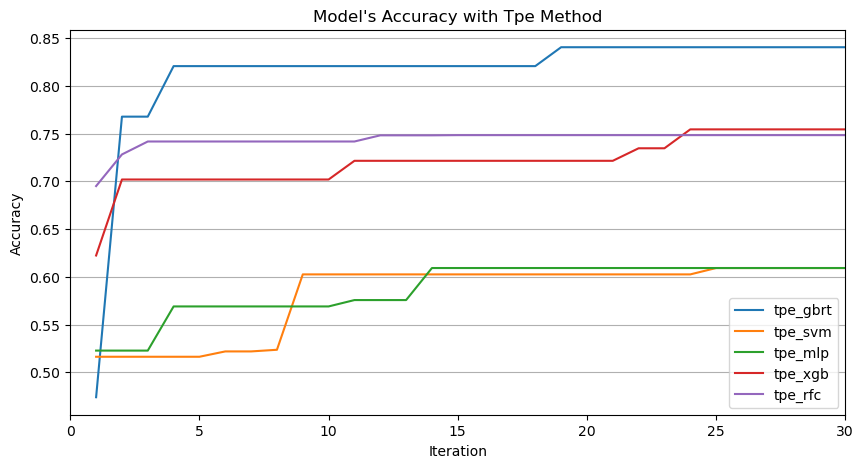

In [45]:
import matplotlib.pyplot as plt
n = 30
xlabel = [i for i in range(1, 1 + n)]
plt.figure(figsize=(10, 5))
plt.grid(axis='y')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Model\'s Accuracy with Tpe Method')
plt.plot(xlabel, s_gbrt, label='tpe_gbrt')
plt.plot(xlabel, s_svm, label='tpe_svm')
plt.plot(xlabel, s_mlp, label='tpe_mlp')
plt.plot(xlabel, s_xgb, label='tpe_xgb')
plt.plot(xlabel, s_rfc, label='tpe_rfc')
plt.legend(loc='lower right')
# plt.ylim(0.5, 0.9)
plt.xlim(0, 30)
plt.xticks([0, 5, 10, 15, 20, 25, 30])

In [ ]:
df1 = pd.DataFrame(s_gbrt, columns=['gbrt'])
df1['mlp'] = s_mlp
df1['svm'] = s_svm
df1['xgb'] = s_xgb
df1

In [50]:
import os
if not os.path.exists('result_dict'):
    os.mkdir('result_dict')

np.savez('result_dict/gbrt.npz', dict_gbrt)
np.savez('result_dict/svm.npz', dict_svm)
np.savez('result_dict/xgb.npz', dict_xgb)
np.savez('result_dict/mlp.npz', dict_mlp)

In [66]:
import joblib
if not os.path.exists('saved_model'):
    os.mkdir('saved_models')
joblib.dump(mlp, 'saved_models/mlp.pkl')

['saved_models/mlp.pkl']

In [73]:
print('xgb: ')
print(res_xgb)
print('-' * 50)
print('svm: ')
print(res_svm)
print('-' * 50)
print('gbrt: ')
print(res_gbrt)
print('-' * 50)
print('mlp: ')
print(res_mlp)

xgb: 
{'colsample_bytree': 0.5038409683775559, 'gamma': 0.0018767787349455748, 'learning_rate': 0.004532682368432205, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 260}
--------------------------------------------------
svm: 
{'C': 71.06202765899431, 'gamma': 0.0013881625198396872, 'kernel': 'rbf'}
--------------------------------------------------
gbrt: 
{'learning_rate': 0.4904590578751573, 'max_depth': 6, 'max_features': 9, 'min_samples_split': 11, 'n_estimators': 240, 'subsample': 0.9720909229026078}
--------------------------------------------------
mlp: 
{'activation': 'tanh', 'alpha': 0.0012814310933205921, 'hidden_layer_sizes': (200, 150), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1938983148106443, 'momentum': 0.14105192297897945, 'solver': 'lbfgs'}


In [74]:
mlp_1.get_params()

{'activation': 'tanh',
 'alpha': 0.0012814310933205921,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (200, 150),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.1938983148106443,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.14105192297897945,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std
from sklearn import metrics
clf_gbrt = GradientBoostingClassifier(**res_gbrt)
clf_gbrt.fit(X_train, y_train)
ypred_gbrt_train = clf_gbrt.predict(X_train)
ypred_gbrt_test = clf_gbrt.predict(X_test)
clf_mlp = MLPClassifier(**res_mlp)
clf_mlp.fit(X_train, y_train)
ypred_mlp_train = clf_mlp.predict(X_train)
ypred_mlp_test = clf_mlp.predict(X_test)
clf_svm = SVC(**res_svm)
clf_svm.fit(X_train, y_train)
ypred_svm_train = clf_svm.predict(X_train)
ypred_svm_test = clf_svm.predict(X_test)
clf_xgb = XGBClassifier(**res_xgb)
clf_xgb.fit(X_train, y_train)
ypred_xgb_train = clf_xgb.predict(X_train)
ypred_xgb_test = clf_xgb.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

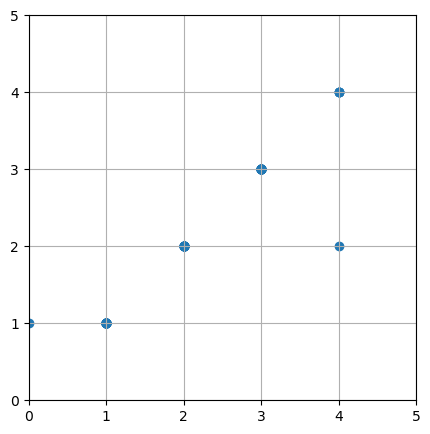

In [54]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, ypred_xgb_train)
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.grid()

In [97]:
df_train = pd.read_csv(r'..\..\Data\隧道围岩项目\训练集.csv')
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
kfold = KFold(n_splits=5, shuffle=True)
dict_rfc = []
for train, test in kfold.split(X):
    X_train = X.iloc[train, :]
    y_train = y.iloc[train]
    X_test = X.iloc[test, :]
    y_test = y.iloc[test]
    rfc = RandomForestClassifier(**res_rfc)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    dict_rfc.append(classification_report(y_test, rfc_pred, output_dict=True))

In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
kfold = KFold(n_splits=5, shuffle=True)
dict_svm = []
dict_xgb = []
dict_gbrt = []
dict_mlp = []
res_xgb = xgb.get_params()
res_svm = svm.get_params()
res_gbrt = gbrt.get_params()
res_mlp = mlp.get_params()
res_mlp['max_iter'] = 1000
for train, test in kfold.split(X):
    X_train = X.iloc[train, :]
    y_train = y.iloc[train]
    X_test = X.iloc[test, :]
    y_test = y.iloc[test]
    svm = SVC(**res_svm)
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    dict_svm.append(classification_report(y_test, svm_pred, output_dict=True))
    xgb = XGBClassifier(**res_xgb)
    xgb.fit(X_train, y_train - 1)
    xgb_pred = xgb.predict(X_test) + 1
    dict_xgb.append(classification_report(y_test, xgb_pred, output_dict=True))
    gbrt = GradientBoostingClassifier(**res_gbrt)
    gbrt.fit(X_train, y_train)
    gbrt_pred = gbrt.predict(X_test)
    mlp = MLPClassifier(**res_mlp)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    dict_gbrt.append(classification_report(y_test, gbrt_pred, output_dict=True))
    dict_mlp.append(classification_report(y_test, mlp_pred, output_dict=True))

d:\program\navigator\envs\Tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program\navigator\envs\Tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program\navigator\envs\Tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program\navigator\envs\Tf\lib\site-packa

In [70]:
dict_gbrt = np.load(r'result_dict/gbrt.npz', allow_pickle=True)['arr_0']
dict_mlp = np.load(r'result_dict/mlp.npz', allow_pickle=True)['arr_0']
dict_svm = np.load(r'result_dict/svm.npz', allow_pickle=True)['arr_0']
dict_xgb = np.load(r'result_dict/xgb.npz', allow_pickle=True)['arr_0']

([<matplotlib.axis.XTick at 0x218882e2770>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

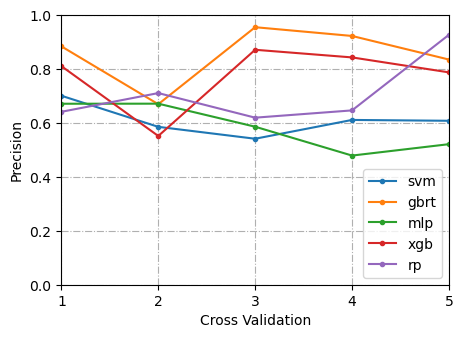

In [72]:
plt.figure(figsize=(5, 3.5))
plt.plot([1, 2, 3, 4, 5],[dict_svm[n]['weighted avg']['precision'] for n in range(5)], label='svm', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_gbrt[n]['weighted avg']['precision'] for n in range(5)], label='gbrt', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_mlp[n]['weighted avg']['precision'] for n in range(5)], label='mlp', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_xgb[n]['weighted avg']['precision'] for n in range(5)], label='xgb', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_rfc[n]['weighted avg']['precision'] for n in range(5)], label='rp', marker='.')
plt.grid(linestyle='-.')
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.xlabel('Cross Validation')
plt.xticks([1, 2, 3, 4, 5])

(0.0, 1.0)

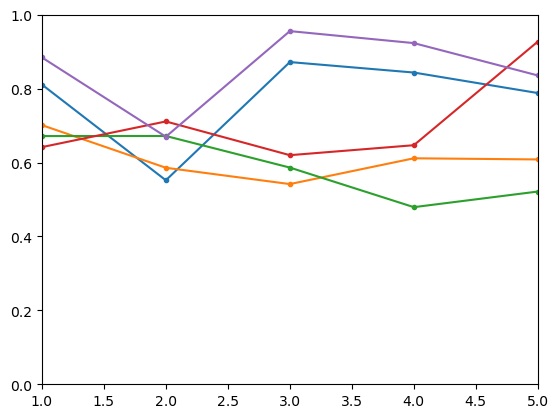

In [81]:
df_precision = pd.DataFrame()
df_precision['xgb'] = [dict_xgb[n]['weighted avg']['precision'] for n in range(5)]
df_precision['svm'] = [dict_svm[n]['weighted avg']['precision'] for n in range(5)]
df_precision['mlp'] = [dict_mlp[n]['weighted avg']['precision'] for n in range(5)]
df_precision['rfc'] = [dict_rfc[n]['weighted avg']['precision'] for n in range(5)]
df_precision['gbrt'] = [dict_gbrt[n]['weighted avg']['precision'] for n in range(5)]
df_precision.to_csv(r'data/outputs/precision.csv', index=False)
for i in range(5):
    plt.plot([1, 2, 3, 4, 5], df_precision.iloc[:, i], label='gbrt', marker='.')
plt.xlim(1, 5)
plt.ylim(0, 1)

In [87]:
res_rfc

{'max_depth': 7, 'max_features': 6, 'n_estimators': 90}

In [82]:
df_recall = pd.DataFrame()
df_recall['xgb'] = [dict_xgb[n]['weighted avg']['recall'] for n in range(5)]
df_recall['svm'] = [dict_svm[n]['weighted avg']['recall'] for n in range(5)]
df_recall['mlp'] = [dict_mlp[n]['weighted avg']['recall'] for n in range(5)]
df_recall['rfc'] = [dict_rfc[n]['weighted avg']['recall'] for n in range(5)]
df_recall['gbrt'] = [dict_gbrt[n]['weighted avg']['recall'] for n in range(5)]
df_recall.to_csv(r'data/outputs/recall.csv', index=False)

In [83]:
df_f1score = pd.DataFrame()
df_f1score['xgb'] = [dict_xgb[n]['weighted avg']['f1-score'] for n in range(5)]
df_f1score['svm'] = [dict_svm[n]['weighted avg']['f1-score'] for n in range(5)]
df_f1score['mlp'] = [dict_mlp[n]['weighted avg']['f1-score'] for n in range(5)]
df_f1score['rfc'] = [dict_rfc[n]['weighted avg']['f1-score'] for n in range(5)]
df_f1score['gbrt'] = [dict_gbrt[n]['weighted avg']['f1-score'] for n in range(5)]
df_f1score.to_csv(r'data/outputs/f1-score.csv', index=False)

([<matplotlib.axis.XTick at 0x2188857bd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

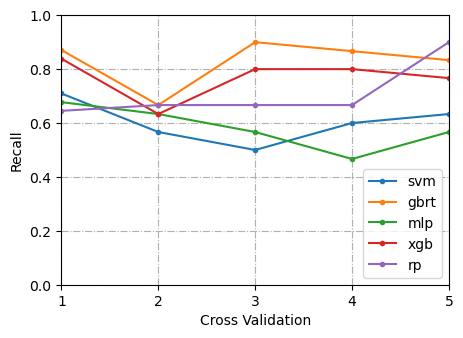

In [75]:
plt.figure(figsize=(5, 3.5))
plt.plot([1, 2, 3, 4, 5],[dict_svm[n]['weighted avg']['recall'] for n in range(5)], label='svm', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_gbrt[n]['weighted avg']['recall'] for n in range(5)], label='gbrt', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_mlp[n]['weighted avg']['recall'] for n in range(5)], label='mlp', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_xgb[n]['weighted avg']['recall'] for n in range(5)], label='xgb', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_rfc[n]['weighted avg']['recall'] for n in range(5)], label='rp', marker='.')
plt.grid(linestyle='-.')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.xlabel('Cross Validation')
plt.xticks([i for i in range(1, 6)])

In [76]:
[dict_svm[n]['weighted avg']['f1-score'] for n in range(5)]

[0.7002150537634407,
 0.5645401382243488,
 0.4948621553884712,
 0.5993691389599317,
 0.6119540229885058]

([<matplotlib.axis.XTick at 0x21888510910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

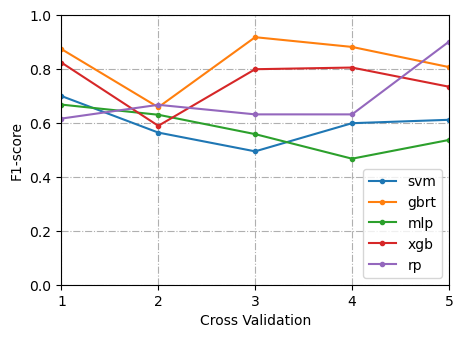

In [74]:
plt.figure(figsize=(5, 3.5))
plt.plot([1, 2, 3, 4, 5],[dict_svm[n]['weighted avg']['f1-score'] for n in range(5)], label='svm', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_gbrt[n]['weighted avg']['f1-score'] for n in range(5)], label='gbrt', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_mlp[n]['weighted avg']['f1-score'] for n in range(5)], label='mlp', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_xgb[n]['weighted avg']['f1-score'] for n in range(5)], label='xgb', marker='.')
plt.plot([1, 2, 3, 4, 5],[dict_rfc[n]['weighted avg']['f1-score'] for n in range(5)], label='rp', marker='.')
plt.grid(linestyle='-.')
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.xlabel('Cross Validation')
plt.xticks([i for i in range(1, 6)])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r"..\..\Data\隧道围岩项目\训练集.csv")
df_test = pd.read_excel(r"D:\program\pycharm\model\Data\隧道围岩项目\测试集.xlsx", sheet_name='Sheet1')
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [19]:
import joblib

# gbrt = joblib.load(r"saved_models/gbrt.pkl")
gbrt = GradientBoostingClassifier(**res_gbrt)
gbrt.fit(X, y)
xgb = joblib.load(r"saved_models/xgb.pkl")
# mlp = joblib.load(r"saved_models/mlp.pkl")
mlp = MLPClassifier(**res_mlp)
mlp.fit(X, y)
svm = joblib.load(r"saved_models/svm.pkl")
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'mlp预测值', 'svm预测值'])
df_res['真实值'] = y_train
df_res['gbrt预测值'] = gbrt.predict(X_train)
df_res['xgb预测值'] = xgb.predict(X_train)+1
df_res['mlp预测值'] = mlp.predict(X_train)
df_res['svm预测值'] = svm.predict(X_train)
df_res.to_csv(r"C:\Users\42253\Downloads\true_pred.csv", encoding='utf_8_sig')
print('the xgb score in test is {}'.format(xgb.score(X_train, y_train - 1)))
print('the gbrt score in test is {}'.format(gbrt.score(X_train, y_train)))
print('the mlp score in test is {}'.format(mlp.score(X_train, y_train)))
print('the svm score in test is {}'.format(svm.score(X_train, y_train)))

the xgb score in test is 0.8826530612244898
the gbrt score in test is 0.9387755102040817
the mlp score in test is 0.7040816326530612
the svm score in test is 0.7448979591836735


In [34]:
import joblib

# gbrt = joblib.load(r"saved_models/gbrt.pkl")
gbrt = GradientBoostingClassifier(**res_gbrt)
gbrt.fit(X, y)
# xgb = joblib.load(r"saved_models/xgb.pkl")
xgb = XGBClassifier(**res_xgb)
xgb.fit(X, y - 1)
# mlp = joblib.load(r"saved_models/mlp.pkl")
mlp = MLPClassifier(**res_mlp)
mlp.fit(X, y)
# svm = joblib.load(r"saved_models/svm.pkl")
svm = SVC(**res_svm)
svm.fit(X, y)
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'mlp预测值', 'svm预测值'])
df_res['真实值'] = y_train
df_res['gbrt预测值'] = gbrt.predict(X_train)
df_res['xgb预测值'] = xgb.predict(X_train)+1
df_res['mlp预测值'] = mlp.predict(X_train)
df_res['svm预测值'] = svm.predict(X_train)
df_res.to_csv(r"C:\Users\42253\Downloads\true_pred.csv", encoding='utf_8_sig')
print('the xgb score in test is {}'.format(xgb.score(X_train, y_train - 1)))
print('the gbrt score in test is {}'.format(gbrt.score(X_train, y_train)))
print('the mlp score in test is {}'.format(mlp.score(X_train, y_train)))
print('the svm score in test is {}'.format(svm.score(X_train, y_train)))

the xgb score in test is 0.9132653061224489
the gbrt score in test is 0.923469387755102
the mlp score in test is 0.7040816326530612
the svm score in test is 0.7857142857142857


In [78]:
test = pd.read_excel(r"../../Data/隧道围岩项目/测试集.xlsx")
from data_pre import data_normalize
nomorlizer = data_normalize(test, 'WD')
test = nomorlizer.fillna_by_random_fix()
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
print('the xgb score in test is {}'.format(xgb.score(X_test, y_test - 1)))
print('the gbrt score in test is {}'.format(gbrt.score(X_test, y_test)))
print('the mlp score in test is {}'.format(mlp.score(X_test, y_test)))
print('the svm score in test is {}'.format(svm.score(X_test, y_test)))

the xgb score in test is 0.8
the gbrt score in test is 0.7263157894736842
the mlp score in test is 0.5368421052631579
the svm score in test is 0.6


In [36]:
import seaborn as sns
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'mlp预测值', 'svm预测值'])
df_res['真实值'] = y_test
df_res['gbrt预测值'] = gbrt.predict(X_test)
df_res['xgb预测值'] = xgb.predict(X_test)+1
df_res['mlp预测值'] = mlp.predict(X_test)
df_res['svm预测值'] = svm.predict(X_test)
df_res

,真实值,gbrt预测值,xgb预测值,mlp预测值,svm预测值
0,4,4,4,4,2
1,4,4,4,4,2
2,2,2,2,2,2
3,2,2,2,4,2
4,2,2,2,2,2
...,...,...,...,...,...
90,3,3,3,3,2
91,2,2,4,2,2
92,3,3,3,3,2
93,3,3,3,3,2


In [53]:
plt.rcParams['font.sans-serif'] = ['SimHei']
df_1 = pd.DataFrame(index=[str(int(i)) for i in range(1, 6)], columns=[str(i) for i in range(1, 6)])
for i in range(5):
    for j in range(5):
        df_1.iloc[i, j] = df_res[(df_res['真实值'] == i + 1) & (df_res['gbrt预测值'] == j + 1)].shape[0]
df_1

,1,2,3,4,5
1,0,0,0,0,0
2,0,24,2,7,0
3,0,2,24,4,0
4,0,0,0,31,0
5,0,0,0,1,0


In [70]:
sns.heatmap(data=df_1.astype(int), cmap='rainbow', annot=True)

NameError: name 'sns' is not defined

In [59]:
df_1.astype(int).dtypes

1    int32
2    int32
3    int32
4    int32
5    int32
dtype: object

In [86]:
gbrt = joblib.load(r"saved_models/mlp.pkl")
gbrt.score(X_train, y_train)

0.7346938775510204

In [1]:
import numpy as np
import pandas as pd
import joblib

In [143]:
df_train = pd.read_csv(r'..\..\Data\隧道围岩项目\训练集.csv')
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]
df_test = pd.read_excel(r'..\..\Data\隧道围岩项目\测试集.xlsx', sheet_name='Sheet1')
df_test = df_test.dropna(axis=0)
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [40]:
xgb = joblib.load(r'saved_models\xgb.pkl')
print('model\'s training set score is {}'.format(clf.score(X, y)))
print('model\'s testing set score is {}'.format(clf.score(X_test, y_test)))

model's training set score is 0.9668874172185431
model's testing set score is 0.723404255319149


In [105]:
import joblib
gbrt = joblib.load(r'saved_models\gbrt.pkl')
xgb = joblib.load(r'saved_models\xgb.pkl')
svm = joblib.load(r'saved_models\svm.pkl')
mlp = joblib.load(r'saved_models\mlp.pkl')
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

for clf in [gbrt, xgb, svm, mlp]:
    if clf == xgb:
        print('model\'s training set score is {}'.format(clf.score(X_train, y_train - 1)))
        print('model\'s testing set score is {}'.format(clf.score(X_test, y_test - 1)))
    else:
        print('model\'s training set score is {}'.format(clf.score(X, y)))
        print('model\'s testing set score is {}'.format(clf.score(X_test, y_test)))

model's training set score is 0.9668874172185431
model's testing set score is 0.723404255319149
model's training set score is 0.9416666666666667
model's testing set score is 0.8297872340425532
model's training set score is 0.9271523178807947
model's testing set score is 0.48936170212765956
model's training set score is 0.9139072847682119
model's testing set score is 0.44680851063829785


In [123]:
from sklearn.model_selection import train_test_split
df_test = pd.read_excel(r'data/测试集.xlsx', sheet_name='Sheet1')
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]
rfc = RandomForestClassifier(**res_rfc)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
rfc.fit(X_train, y_train)
print(rfc.score(X, y))
print(rfc.score(X_test, y_test))

0.9470198675496688
0.7127659574468085


In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
gbrt = GradientBoostingClassifier(**gbrt.get_params())
xgb = XGBClassifier(**xgb.get_params())
svm = SVC(**svm.get_params())
mlp = MLPClassifier(**mlp.get_params())

for i, clf in enumerate([gbrt, xgb, svm, mlp]):
    name = ['gbrt', 'xgb', 'svm', 'mlp']
    if clf == xgb:
        clf.fit(X_train, y_train - 1)
        print('{} model\'s training set score is {}'.format(name[i], clf.score(X_train, y_train - 1)))
        print('{} model\'s val set score is {}'.format(name[i], clf.score(X_val, y_val - 1)))
        print('{} model\'s testing set score is {}'.format(name[i], clf.score(X_test, y_test - 1)))
    else:
        clf.fit(X_train, y_train)
        print('{} model\'s training set score is {}'.format(name[i], clf.score(X, y)))
        print('{} model\'s val set score is {}'.format(name[i], clf.score(X_val, y_val)))
        print('{} model\'s testing set score is {}'.format(name[i], clf.score(X_test, y_test)))

gbrt model's training set score is 0.9801324503311258
gbrt model's val set score is 0.9032258064516129
gbrt model's testing set score is 0.7684210526315789
xgb model's training set score is 1.0
xgb model's val set score is 0.8709677419354839
xgb model's testing set score is 0.7578947368421053
svm model's training set score is 0.9271523178807947
svm model's val set score is 0.6451612903225806
svm model's testing set score is 0.5157894736842106
mlp model's training set score is 0.8874172185430463
mlp model's val set score is 0.6451612903225806
mlp model's testing set score is 0.43157894736842106


d:\program\navigator\envs\Tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [114]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(**gbrt.get_params()), X, y, cv=5).mean()

d:\program\navigator\envs\Tf\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.8010752688172044

In [84]:
gbrt.score(X_test, y_test)

0.8105263157894737

In [110]:
import seaborn as sns
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'mlp预测值', 'svm预测值', 'rf预测值'])
df_res['真实值'] = y_test
df_res['gbrt预测值'] = gbrt.predict(X_test)
df_res['xgb预测值'] = xgb.predict(X_test)+1
df_res['mlp预测值'] = mlp.predict(X_test)
df_res['svm预测值'] = svm.predict(X_test)
df_res['rf预测值'] = rfc.predict(X_test)
df_res.to_csv(r'data\outputs\true_pred.csv', index=False)

In [113]:
df_res.to_csv(r'data\outputs\true_pred.csv', index=False, encoding='utf-8-sig')

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_res = pd.read_csv(r'..\..\Data\隧道围岩项目\pred.csv', encoding='ANSI')
df_res


,真实值,gbrt预测值,xgb预测值,svm真实值,mlp预测值
0,4,2,3,3,3
1,4,2,3,3,2
2,2,2,3,3,2
3,2,2,2,4,2
4,2,2,2,3,4
...,...,...,...,...,...
90,3,3,3,3,4
91,2,4,4,4,2
92,3,3,3,3,4
93,3,3,3,3,2


In [163]:
pd.DataFrame(rfc.predict(X_test)).to_csv(r'data/outputs/te.csv')

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_res = pd.read_csv(r'data\outputs\pred.csv', encoding='ANSI')
df_res

,真实值,gbrt预测值,xgb预测值,svm真实值,mlp预测值,rfc预测值
0,4,2,3,3,3,3
1,4,2,3,3,2,2
2,2,2,3,3,2,2
3,2,2,2,4,2,2
4,2,2,2,3,4,2
...,...,...,...,...,...,...
90,3,3,3,3,4,3
91,2,4,4,4,2,2
92,3,3,3,3,4,3
93,3,3,3,3,2,3


In [168]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
df_1 = pd.DataFrame(index=['I', 'II', 'III', 'IV', 'V'], columns=['I', 'II', 'III', 'IV', 'V'])
for i in range(5):
    for j in range(5):
        df_1.iloc[i, j] = df_res[(df_res['真实值'] == i + 1) & (df_res['rfc预测值'] == j + 1)].shape[0]
if df_1.iloc[1, 1] == 26:
    df_1.iloc[1, 1] = 27
    df_1.iloc[1, 3] = 3
# df_1.to_csv(r"C:\Users\42253\Downloads\mlp.csv")

Text(44.722222222222214, 0.5, 'True')

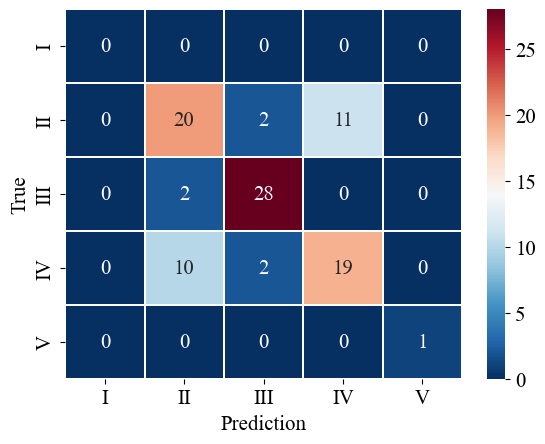

In [169]:
rc = plt.rc('font',family='Times New Roman',size=15)
sns.heatmap(data=df_1.astype(int), linewidths=0.3, cmap='RdBu_r', annot=True)
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('True', fontsize=15)

In [49]:
df_res.columns = ['真实值', 'gbrt预测值', 'xgb预测值', 'svm预测值', 'mlp预测值']

In [180]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from xgboost import XGBClassifier
xgb = joblib.load(r'saved_models\xgb.pkl')
svm = joblib.load(r'saved_models\svm.pkl')
gbrt = joblib.load(r'saved_models\gbrt.pkl')
mlp = joblib.load(r'saved_models\mlp.pkl')
rfc = joblib.load(r'saved_models\rfc.pkl')
df_train = pd.read_csv(r'..\..\Data\隧道围岩项目\训练集.csv')
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
xgb_pred = xgb.predict(X_train) + 1
svmpred = svm.predict(X_train)
gbrtpred= gbrt.predict(X_train)
mlppred = mlp.predict(X_train)
rfcpred = rfc.predict(X_train)
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'svm预测值', 'mlp预测值', 'rfc预测值'])
df_res['真实值'] = y_train
df_res['gbrt预测值'] = gbrtpred
df_res['xgb预测值'] = xgb_pred
df_res['svm预测值'] = svmpred
df_res['mlp预测值'] = mlppred
df_res['rfc预测值'] = rfcpred
df_res.to_csv(r'data/outputs/train_pred.csv', index=False, encoding='utf-8-sig')

In [178]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
df_1 = pd.DataFrame(index=['I', 'II', 'III', 'IV', 'V'], columns=['I', 'II', 'III', 'IV', 'V'])
for i in range(5):
    for j in range(5):
        df_1.iloc[i, j] = df_res[(df_res['真实'] == i + 1) & (df_res['rfc预测值'] == j + 1)].shape[0]
# df_1.to_csv(r"C:\Users\42253\Downloads\train_mlp.csv")

Text(44.722222222222214, 0.5, 'True')

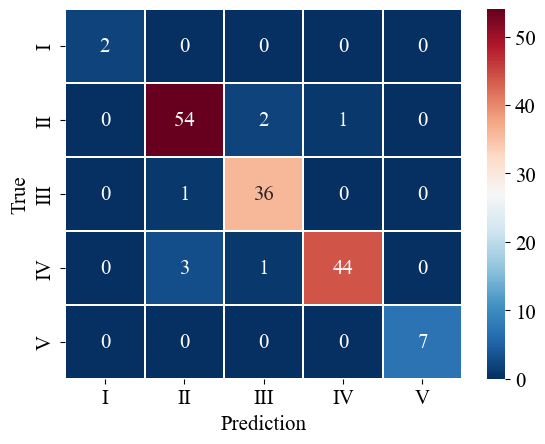

In [179]:
# rc = plt.rc('font',family='Times New Roman',size=12)
# sns.set_theme(font_scale=1.5)
rc = plt.rc('font',family='Times New Roman',size=15)
sns.heatmap(data=df_1.astype(int), linewidths=0.3, cmap='RdBu_r', annot=True)
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('True', fontsize=15)

In [56]:
print("finish")

finish
